In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset from external storage
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Data Cleaning

In [3]:
# drop unuseful column from dataframe
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# check shape of our dataframe
df.shape

(607, 11)

In [6]:
# check null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# check unique values and value counts in work year column
print('Unique Values:', df.work_year.unique(), '\n')
print('Value Counts:\n',df.work_year.value_counts())

Unique Values: [2020 2021 2022] 

Value Counts:
 2022    318
2021    217
2020     72
Name: work_year, dtype: int64


In [8]:
# check unique values and value counts in experience lavel column
print('Unique Values:', df.experience_level.unique(), '\n')
print('Value Counts:\n',df.experience_level.value_counts())

Unique Values: ['MI' 'SE' 'EN' 'EX'] 

Value Counts:
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


In [9]:
# check unique values and value counts in employment type column
print('Unique Values:', df.employment_type.unique(), '\n')
print('Value Counts:\n',df.employment_type.value_counts())

Unique Values: ['FT' 'CT' 'PT' 'FL'] 

Value Counts:
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


In [10]:
# check value counts and value counts of job title
print('Unique Values:', df.job_title.unique(), '\n')
print('Value Counts:\n',df.job_title.value_counts())

Unique Values: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Fi

In [11]:
df['job_title'] = df['job_title'].replace(['Data Analytics Lead','Marketing Data Analyst','Finance Data Analyst','Financial Data Analyst','Principal Data Analyst',
                        'Product Data Analyst','Lead Data Analyst','Business Data Analyst', 'BI Data Analyst','Data Analytics Manager'],'Data Analyst')
df['job_title'] = df['job_title'].replace(['Big Data Architect','Cloud Data Engineer','Director of Data Engineering','Principal Data Engineer','Data Science Engineer','Computer Vision Software Engineer',
                        'Analytics Engineer','Data Analytics Engineer','Lead Data Engineer','Data Engineering Manager','Big Data Engineer','Data Architect','ETL Developer','3D Computer Vision Researcher'], 'Data Engineer')
df['job_title'] = df['job_title'].replace(['Research Scientist','Data Science Manager','Data Science Consultant','Director of Data Science',
                        'Principal Data Scientist','Applied Data Scientist','Head of Data Science',
                        'Head of Data','Lead Data Scientist','Staff Data Scientist','Data Specialist'],'Data Scientist')
df['job_title'] = df['job_title'].replace(['Machine Learning Engineer','Machine Learning Scientist','AI Scientist','Computer Vision Engineer','Applied Machine Learning Scientist',
                                          'Machine Learning Infrastructure Engineer','Machine Learning Developer','Machine Learning Manager','Head of Machine Learning','NLP Engineer','Lead Machine Learning Engineer'],'ML Engineer')

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,ML Engineer,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,ML Engineer,150000,USD,150000,US,50,US,L


In [13]:
# copy dataframe
dfx = df.copy()

In [14]:
# drop unnecessary columns
dfx.drop(['salary','salary_currency','employee_residence','remote_ratio'],axis = 1, inplace = True)

In [15]:
dfx.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,L
1,2020,SE,FT,ML Engineer,260000,JP,S
2,2020,SE,FT,Data Engineer,109024,GB,M
3,2020,MI,FT,Data Analyst,20000,HN,S
4,2020,SE,FT,ML Engineer,150000,US,L
5,2020,EN,FT,Data Analyst,72000,US,L
6,2020,SE,FT,Data Scientist,190000,US,S
7,2020,MI,FT,Data Scientist,35735,HU,L
8,2020,MI,FT,Data Analyst,135000,US,L
9,2020,SE,FT,Data Engineer,125000,NZ,S


In [16]:
# check value counts and value counts of company location
print('Unique Values:', dfx.company_location.unique(), '\n')
print('Value Counts:\n',dfx.company_location.value_counts())

Unique Values: ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE'] 

Value Counts:
 US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64


In [17]:
com_loc = dfx.company_location.value_counts()
less_10 = com_loc[com_loc<10]
less_10

JP    6
NL    4
AT    4
PT    4
PL    4
LU    3
PK    3
BR    3
AE    3
MX    3
AU    3
TR    3
DK    3
IT    2
CZ    2
SI    2
RU    2
CH    2
NG    2
CN    2
BE    2
VN    1
EE    1
AS    1
DZ    1
MY    1
MD    1
KE    1
SG    1
CO    1
IR    1
CL    1
MT    1
IL    1
UA    1
IQ    1
RO    1
HR    1
NZ    1
HU    1
HN    1
IE    1
Name: company_location, dtype: int64

In [18]:
dfx['company_location'] = dfx['company_location'].apply(lambda x: 'OTHERS' if x in less_10 else x)

In [19]:
# check value counts and value counts of company location after replcing
print('Unique Values:', dfx.company_location.unique(), '\n')
print('Value Counts:\n',dfx.company_location.value_counts())

Unique Values: ['DE' 'OTHERS' 'GB' 'US' 'FR' 'IN' 'GR' 'CA' 'ES'] 

Value Counts:
 US        355
OTHERS     83
GB         47
CA         30
DE         28
IN         24
FR         15
ES         14
GR         11
Name: company_location, dtype: int64


In [20]:
# only select important records
dfx = dfx[dfx['company_location'] != 'OTHERS']

In [21]:
dfx

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,L
2,2020,SE,FT,Data Engineer,109024,GB,M
4,2020,SE,FT,ML Engineer,150000,US,L
5,2020,EN,FT,Data Analyst,72000,US,L
6,2020,SE,FT,Data Scientist,190000,US,S
...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,M
603,2022,SE,FT,Data Engineer,126000,US,M
604,2022,SE,FT,Data Analyst,129000,US,M
605,2022,SE,FT,Data Analyst,150000,US,M


In [22]:
# check value counts and value counts of company size
print('Unique Values:', dfx.company_size.unique(), '\n')
print('Value Counts:\n',dfx.company_size.value_counts())

Unique Values: ['L' 'M' 'S'] 

Value Counts:
 M    305
L    163
S     56
Name: company_size, dtype: int64


# Find And Remove Outliers

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


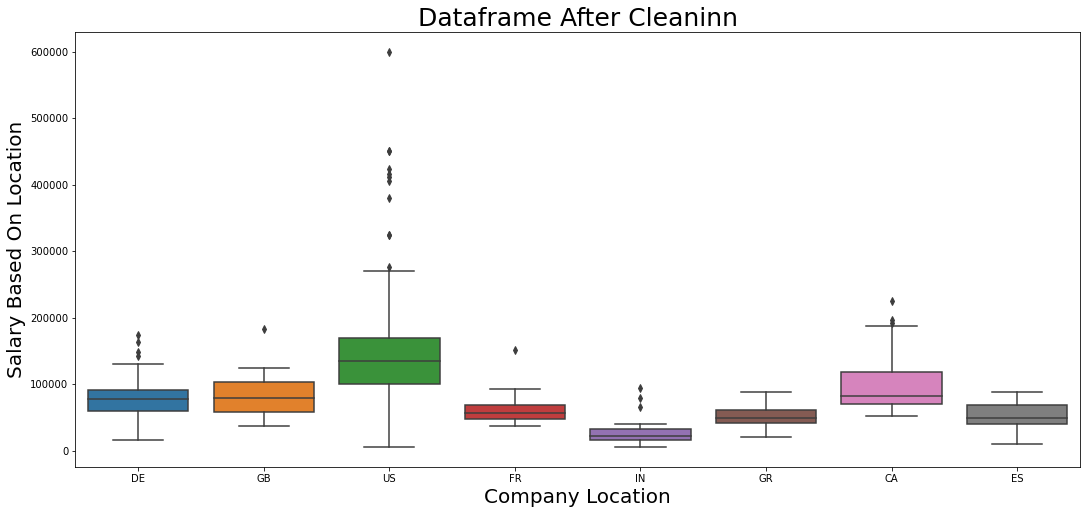

In [44]:
# check outliers by boxplot
plt.figure(figsize = (18,8))
sns.boxplot(dfx.company_location,dfx.salary_in_usd)
plt.title('Dataframe Before Cleaning', fontsize = 25)
plt.xlabel('Company Location', fontsize = 20)
plt.ylabel('Salary Based On Location', fontsize = 20)
plt.show()

In [47]:
# india
india = dfx[dfx['company_location']=='IN']
first = india['salary_in_usd'].quantile(0.25)
third = india['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
india['salary_in_usd'] = india['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# america
america = dfx[dfx['company_location']=='US']
first = america['salary_in_usd'].quantile(0.25)
third = america['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
america['salary_in_usd'] = america['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# germany
germany = dfx[dfx['company_location']=='DE']
first = germany['salary_in_usd'].quantile(0.25)
third = germany['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
germany['salary_in_usd'] = germany['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# uk
uk = dfx[dfx['company_location']=='GB']
first = uk['salary_in_usd'].quantile(0.25)
third = uk['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
uk['salary_in_usd'] = uk['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# france
france = dfx[dfx['company_location']=='FR']
first = france['salary_in_usd'].quantile(0.25)
third = france['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
france['salary_in_usd'] = france['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# greece
greece = dfx[dfx['company_location']=='GR']
first = greece['salary_in_usd'].quantile(0.25)
third = greece['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
greece['salary_in_usd'] = greece['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# canada
canada = dfx[dfx['company_location']=='CA']
first = canada['salary_in_usd'].quantile(0.25)
third = canada['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
canada['salary_in_usd'] = canada['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)

# spain
spain = dfx[dfx['company_location']=='ES']
first = spain['salary_in_usd'].quantile(0.25)
third = spain['salary_in_usd'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
spain['salary_in_usd'] = spain['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)


C:\Users\mridh\AppData\Local\Temp/ipykernel_8552/2567080165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['salary_in_usd'] = india['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)
C:\Users\mridh\AppData\Local\Temp/ipykernel_8552/2567080165.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america['salary_in_usd'] = america['salary_in_usd'].apply(lambda x: upper_limit if x > upper_limit else x)
C:\Users\mridh\AppData\Local\Temp/ipykernel_8552/2567080165.py:26: SettingWit

In [48]:
# concate all dataframe
dff = pd.concat([india,canada,america,spain,germany,greece,france,uk],ignore_index=True)

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


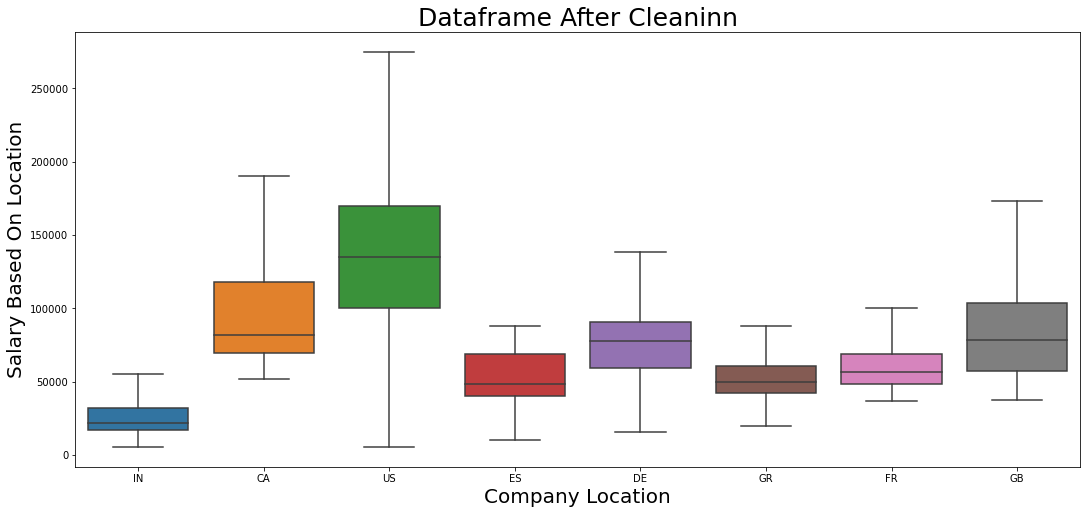

In [50]:
# boxplot after cleaning
plt.figure(figsize = (18,8))
sns.boxplot(dff.company_location,dff.salary_in_usd)
plt.title('Dataframe After Cleaning', fontsize = 25)
plt.xlabel('Company Location', fontsize = 20)
plt.ylabel('Salary Based On Location', fontsize = 20)
plt.show()

In [45]:
dfx.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,L
2,2020,SE,FT,Data Engineer,109024,GB,M
4,2020,SE,FT,ML Engineer,150000,US,L
5,2020,EN,FT,Data Analyst,72000,US,L
6,2020,SE,FT,Data Scientist,190000,US,S


**Now Our Data Set Is Pretty Clean, So We Can Encode Our Data**

# Data Encoding

In [51]:
n_df = pd.get_dummies(dff)

In [52]:
n_df.head()

,work_year,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IN,company_location_US,company_size_L,company_size_M,company_size_S
0,2020,40481.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2020,5707.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2020,6072.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,2020,6072.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,2021,5409.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


# Model Building

In [53]:
# split features and target data 
X = n_df.drop('salary_in_usd',axis = 1)
y = n_df['salary_in_usd']

In [55]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Ridge Regression

In [57]:
# import ridge for prediction
from sklearn.linear_model import Ridge
redge = Ridge()
params = {'alpha':[1e-20,1e-10,1e-15,1,2,3,4,5,6,7,8,9,10]}
redge_reg = GridSearchCV(redge,params,scoring='neg_mean_squared_error',cv = 5)
redge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-20, 1e-10, 1e-15, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10]},
             scoring='neg_mean_squared_error')

In [58]:
# check best parameter and score
print('Best Parameter:', redge_reg.best_params_)
print('Best Score:', redge_reg.best_score_)

Best Parameter: {'alpha': 1}
Best Score: -1838628759.281855


In [59]:
# prediction on test data
y_pred = redge_reg.predict(X_test)

In [60]:
# import r2 score to check performance of our model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5436004190463006

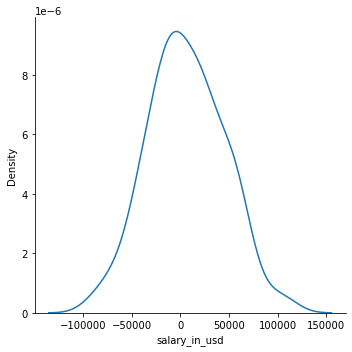

In [61]:
# check performance of our model by histogram
sns.displot(y_pred-y_test,kind = 'kde')
plt.show()

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


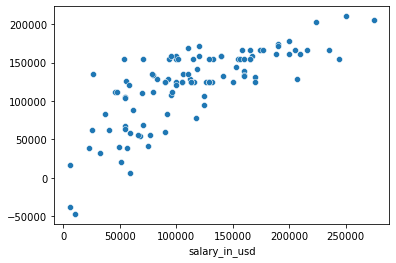

In [66]:
# check accuracy and performance of our model by scatter plot
sns.scatterplot(y_test,y_pred)
plt.show()

# Lasso Regression

In [68]:
# import lasso for prediction
from sklearn.linear_model import Lasso()
lasso = Lasso()
lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv = 5)
lasso_reg.fit(X_train,y_train)

C:\Users\mridh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239360219920.34723, tolerance: 121234490.09385274
  model = cd_fast.enet_coordinate_descent(
C:\Users\mridh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283428511567.6656, tolerance: 129495620.17740537
  model = cd_fast.enet_coordinate_descent(
C:\Users\mridh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287267734668.1821, tolerance: 127075983.7864213
  model = cd_fast.enet_coordinate_descent(
C:\Users\mridh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-10, 1e-15, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10]},
             scoring='neg_mean_squared_error')

In [69]:
# check best parameter and score
print('Best Parameter:', lasso_reg.best_params_)
print('Best Score:', lasso_reg.best_score_)

Best Parameter: {'alpha': 1}
Best Score: -1847501065.5213654


In [72]:
# prediction on test data
y_pred = lasso_reg.predict(X_test)

In [73]:
# check performance of our model by r2 score
r2_score(y_test,y_pred)

0.5342647728405949

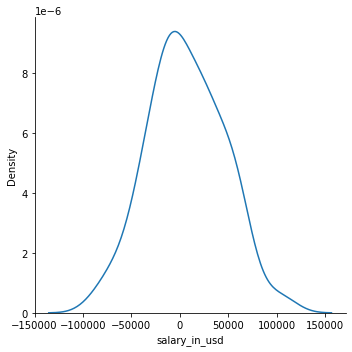

In [74]:
# check performance by histogram
sns.displot(y_pred-y_test,kind = 'kde')
plt.show()

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


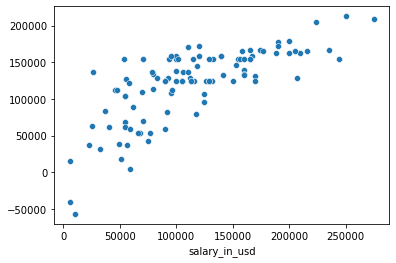

In [76]:
# check performance by sctter plot
sns.scatterplot(y_test,y_pred)
plt.show()

**We Got 54.36% From Ridge Regression And 53.42% From Lasso Regression, So We Can Considar That Ridge Regression Is Performing Well With Our Data**